In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
path = '/Users/harpercho/Downloads/doi_10.5061_dryad.2z34tmpp9__v5/AKCA127.mat'

f = h5py.File(path,'r')
list(f.keys())
dset = f['matchedBothSim']['pearson']
dset.shape

(1398, 32, 32)

In [3]:
dset = np.array(dset)

In [4]:
dset = np.nan_to_num(np.nanmean(dset, axis = 0), nan = 0)
corr = dset + dset.T
print(corr)
dissimilarity = 1 - corr

[[0.         0.25512632 0.44201256 ... 0.09534466 0.0835206  0.09638935]
 [0.25512632 0.         0.37550616 ... 0.10946831 0.10847613 0.18980307]
 [0.44201256 0.37550616 0.         ... 0.14962533 0.15004626 0.08966649]
 ...
 [0.09534466 0.10946831 0.14962533 ... 0.         0.51807251 0.30748982]
 [0.0835206  0.10847613 0.15004626 ... 0.51807251 0.         0.36797697]
 [0.09638935 0.18980307 0.08966649 ... 0.30748982 0.36797697 0.        ]]


/Users/harpercho/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [5]:
dissimilarity

array([[1.        , 0.74487368, 0.55798744, ..., 0.90465534, 0.9164794 ,
        0.90361065],
       [0.74487368, 1.        , 0.62449384, ..., 0.89053169, 0.89152387,
        0.81019693],
       [0.55798744, 0.62449384, 1.        , ..., 0.85037467, 0.84995374,
        0.91033351],
       ...,
       [0.90465534, 0.89053169, 0.85037467, ..., 1.        , 0.48192749,
        0.69251018],
       [0.9164794 , 0.89152387, 0.84995374, ..., 0.48192749, 1.        ,
        0.63202303],
       [0.90361065, 0.81019693, 0.91033351, ..., 0.69251018, 0.63202303,
        1.        ]])

In [6]:
np.fill_diagonal(dissimilarity, 0)

Text(0.5, 1.0, 'Dissimilarity')

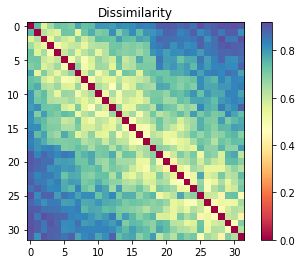

In [18]:
plt.imshow(dissimilarity, cmap = 'Spectral')
plt.colorbar()
plt.title("Dissimilarity")

In [8]:
from sklearn.manifold import MDS

No handles with labels found to put in legend.


20.721438486415785


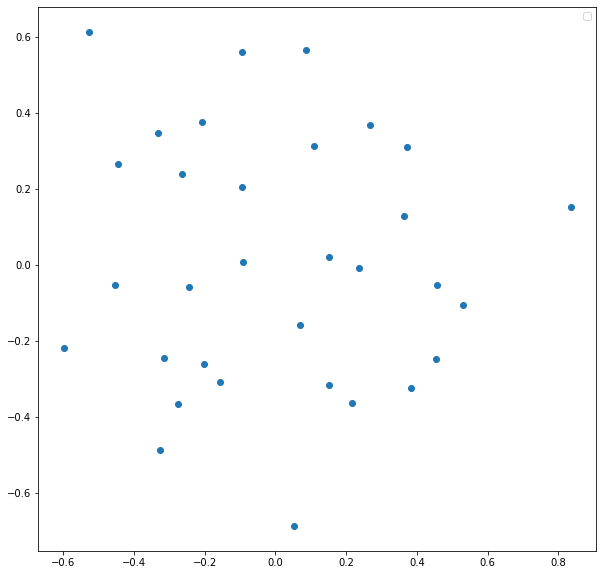

In [19]:
mds = MDS(n_components=2, metric = False, dissimilarity = "precomputed")
pos = mds.fit_transform(dissimilarity).T

plt.figure(figsize = (10,10))
plt.scatter(pos[0], pos[1])
print(mds.stress_)

plt.legend()